In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
from datetime import datetime,timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func
from sqlalchemy import MetaData
from sqlalchemy.orm import sessionmaker

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
metadata = MetaData()

# reflect the tables
metadata.reflect(bind=engine)

In [6]:
# View all of the classes that automap found
base = automap_base(metadata=metadata)
base.prepare()

In [7]:
# Save references to each table
station = base.classes.station
measurment=base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB

Session = sessionmaker(bind=engine)
session = Session()
stations = session.query(station).all()

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
most_recent_date2 = session.query(measurment.date).order_by(measurment.date.desc()).first()[0]
print(most_recent_date2)

2017-08-23


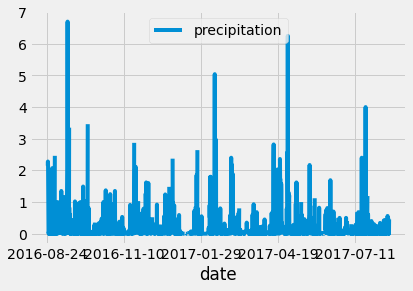

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
start_date = datetime.strptime(most_recent_date2, '%Y-%m-%d') - timedelta(days=365)

previous_year_results = session.query(measurment.date, measurment.prcp).filter(measurment.date >= start_date)\
                  .filter(measurment.date <= most_recent_date2)\
                  .all()

df = pd.DataFrame(previous_year_results, columns=['date', 'precipitation'])


df.set_index('date', inplace=True)

# Calculate the date one year from the last date in data set.

one_year_from_start = datetime.strptime(most_recent_date2, '%Y-%m-%d') - timedelta(days=365)
# Perform a query to retrieve the data and precipitation scores
previous_year_results = session.query(measurment.date, measurment.prcp).filter(measurment.date >= start_date)\
                  .filter(measurment.date <= most_recent_date2)\
                  .all()

# Save the query results as a Pandas DataFrame and set the index to the date column


df = pd.DataFrame(previous_year_results, columns=['date', 'precipitation'])


df.set_index('date', inplace=True)

# Sort the dataframe by date
df_sorted = df.sort_values('date')

df_sorted.plot()


# Use Pandas Plotting with Matplotlib to plot the data
plt.show()



In [11]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_stats = df['precipitation'].describe()

# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number stations in the dataset
station_count = session.query(func.count(station.id)).scalar()

In [13]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.
observation_count_results = session.query(measurment.station, func.count(measurment.station),measurment.date).\
            group_by(measurment.station).order_by(func.count(measurment.station).desc()).all()

station_id_with_most_observations =observation_count_results[0][0]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
station_with_most_observations_count =observation_count_results[0][1] 

statistics_of_most_observation = session.query(func.min(measurment.tobs), func.max(measurment.tobs), func.avg(measurment.tobs)) \
                 .filter(measurment.station == station_id_with_most_observations) \
                 .all()


lowest_temperature=statistics_of_most_observation[0][0]
highest_temperature=statistics_of_most_observation[0][1]
average_temperature=statistics_of_most_observation[0][2]

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram

date_of_having_most_observation_station =observation_count_results[0][2]

last_year_date = datetime.strptime(date_of_having_most_observation_station, '%Y-%m-%d') - timedelta(days=365)

previous_year_results_for_tob = session.query(measurment.station, measurment.tobs,measurment.date).filter(measurment.date >= last_year_date)\
                  .filter(measurment.date <= date_of_having_most_observation_station)\
                  .all()

# Close session

In [16]:
# Close Session
session.close()